<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝

- ANN

- 경사하강법

- 오차역전파

- Optimizer

- CNN

- RNN, LSTM, GRU

- ResNet

#GRU

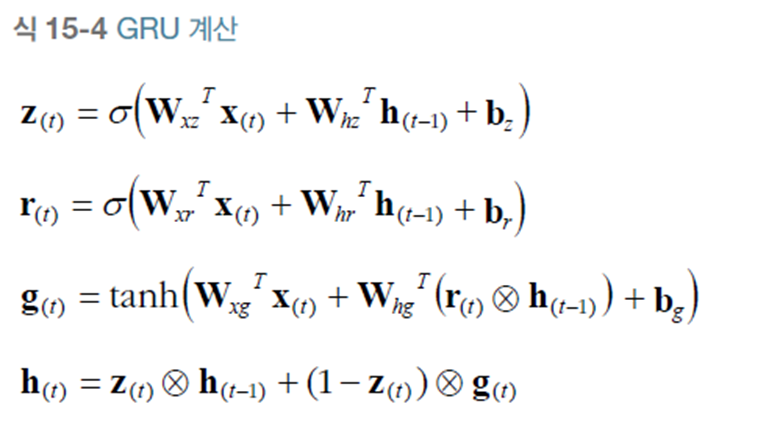

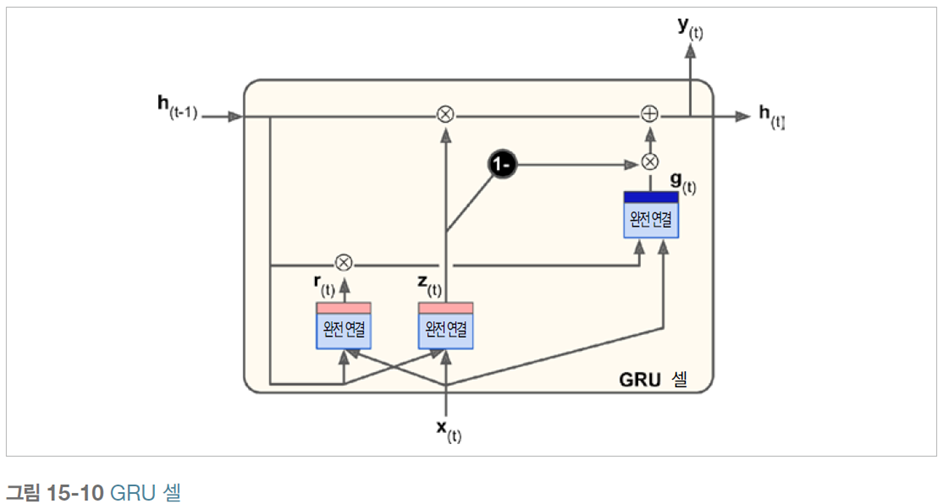

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
train_seq.shape, train_target.shape, val_seq.shape, val_target.shape, test_input.shape, test_target.shape

((20000, 100), (20000,), (5000, 100), (5000,), (25000,), (25000,))

In [ ]:
from tensorflow import keras

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
cp_cb = keras.callbacks.ModelCheckpoint('best_gru-model.h5', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks = [cp_cb, es_cb])

Epoch 1/100
313/313 [==============================] - 20s 36ms/step - loss: 0.6928 - accuracy: 0.5232 - val_loss: 0.6924 - val_accuracy: 0.5262
Epoch 2/100
 10/313 [..............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 15ms/step - loss: 0.6920 - accuracy: 0.5503 - val_loss: 0.6916 - val_accuracy: 0.5378
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6909 - accuracy: 0.5655 - val_loss: 0.6904 - val_accuracy: 0.5494
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6892 - accuracy: 0.5717 - val_loss: 0.6883 - val_accuracy: 0.5714
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6864 - accuracy: 0.5888 - val_loss: 0.6851 - val_accuracy: 0.5854
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6820 - accuracy: 0.6002 - val_loss: 0.6801 - val_accuracy: 0.5910
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6751 - accuracy: 0.6111 - val_loss: 0.6723 - val_accuracy: 0.6064
Epoch 8/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6643 - accuracy: 0.6249 - val_loss: 0.6600 - val_accuracy: 0.6260
Epoc

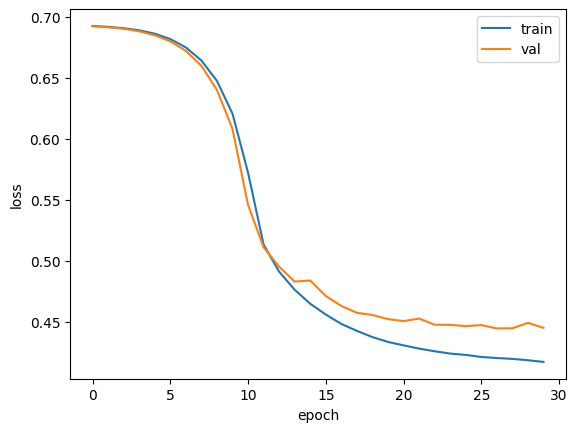

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
test_input.shape, test_target.shape

((25000,), (25000,))

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)

In [ ]:
ls

best_gru-model.h5  sample_data/


In [ ]:
rnn_model = keras.models.load_model('best_gru-model.h5')

In [ ]:
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 4s 4ms/step - loss: 0.4420 - accuracy: 0.7971


[0.44199782609939575, 0.7970799803733826]

In [ ]:
ls ./drive/MyDrive/BTC*

./drive/MyDrive/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv  ./drive/MyDrive/BTC_USD_CoinDesk.csv


In [ ]:
df = pd.read_csv('./drive/MyDrive/BTC_USD_CoinDesk.csv')

In [ ]:
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-02-28,3772.936335,3796.637284,3824.165879,3666.524016
1,BTC,2019-03-01,3799.678543,3773.441461,3879.231185,3753.800022
2,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498
3,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216
4,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048
...,...,...,...,...,...,...
360,BTC,2020-02-24,9919.551448,9689.085992,10008.540472,9666.519497
361,BTC,2020-02-25,9640.469505,9921.048562,10008.378491,9480.185942
362,BTC,2020-02-26,9392.869629,9640.468562,9679.595090,9251.115834
363,BTC,2020-02-27,8787.978363,9392.868579,9393.864137,8626.935746


In [ ]:
seq = df[['Closing Price (USD)']].to_numpy()

In [ ]:
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

In [ ]:
w=7
h=1

In [ ]:
X, Y = seq2dataset(seq, w, h)

In [ ]:
X.shape, Y.shape

((358, 7, 1), (358, 1))

In [ ]:
X[:3]

array([[[3772.93633533],
        [3799.67854295],
        [3811.61197937],
        [3804.41917011],
        [3782.66410112],
        [3689.86289319],
        [3832.08088473]],

       [[3799.67854295],
        [3811.61197937],
        [3804.41917011],
        [3782.66410112],
        [3689.86289319],
        [3832.08088473],
        [3848.95636968]],

       [[3811.61197937],
        [3804.41917011],
        [3782.66410112],
        [3689.86289319],
        [3832.08088473],
        [3848.95636968],
        [3859.83998333]]])

In [ ]:
split = int(len(X)*0.7)

In [ ]:
split

250

In [ ]:
x_train = X[0:split]
y_train = Y[0:split]

In [ ]:
x_train.shape, y_train.shape

((250, 7, 1), (250, 1))

In [ ]:
x_test = X[split:]
y_test = Y[split:]

In [ ]:
x_test.shape, y_test.shape

((108, 7, 1), (108, 1))

In [ ]:
model = keras.models.Sequential()

In [ ]:
x_train[0].shape

(7, 1)

In [ ]:
model.add(keras.layers.LSTM(128, activation='relu', input_shape=x_train[0].shape))
model.add(keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=200, batch_size=1, validation_data=(x_test, y_test))

Epoch 1/200
250/250 [==============================] - 3s 8ms/step - loss: 1221.8492 - mae: 1221.8492 - val_loss: 314.6406 - val_mae: 314.6406
Epoch 2/200
250/250 [==============================] - 2s 7ms/step - loss: 576.5795 - mae: 576.5795 - val_loss: 314.7960 - val_mae: 314.7960
Epoch 3/200
250/250 [==============================] - 2s 7ms/step - loss: 517.8629 - mae: 517.8629 - val_loss: 705.9461 - val_mae: 705.9461
Epoch 4/200
250/250 [==============================] - 3s 11ms/step - loss: 512.3765 - mae: 512.3765 - val_loss: 538.2796 - val_mae: 538.2796
Epoch 5/200
250/250 [==============================] - 5s 19ms/step - loss: 508.7390 - mae: 508.7390 - val_loss: 368.1511 - val_mae: 368.1511
Epoch 6/200
250/250 [==============================] - 2s 9ms/step - loss: 565.1747 - mae: 565.1747 - val_loss: 340.0316 - val_mae: 340.0316
Epoch 7/200
250/250 [==============================] - 2s 7ms/step - loss: 487.5236 - mae: 487.5236 - val_loss: 323.6679 - val_mae: 323.6679
Epoch 8/2

In [ ]:
ev = model.evaluate(x_test, y_test)
print(ev)

4/4 [==============================] - 0s 5ms/step - loss: 181.2493 - mae: 181.2493
[181.24925231933594, 181.24925231933594]


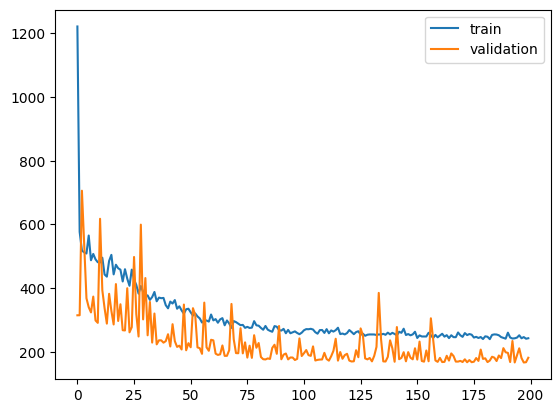

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['train', 'validation'])
plt.show()

예측값 표출

4/4 [==============================] - 0s 5ms/step


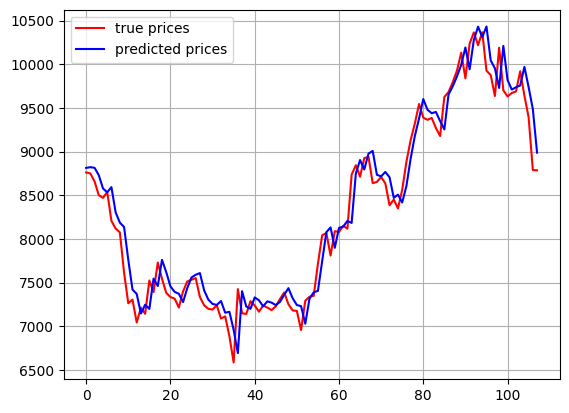

In [ ]:
pred = model.predict(x_test)
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['true prices', 'predicted prices'])
plt.grid()
plt.show()

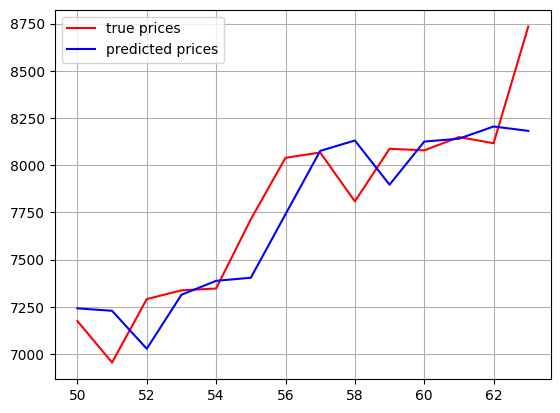

In [ ]:
x_range = range(50, 64)
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['true prices', 'predicted prices'])
plt.grid()
plt.show()

#ImageDataGenerator

ImageDataGenerator : 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꿔주는 파이썬 발생자

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import expand_dims

In [ ]:
ls ./drive/MyDrive/*.jpeg

./drive/MyDrive/nuriho.jpeg


In [ ]:
img = load_img('./drive/MyDrive/nuriho.jpeg')

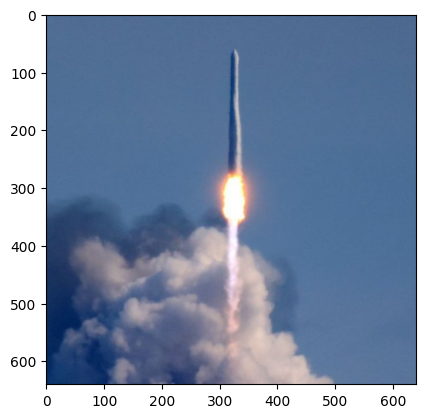

In [ ]:
plt.imshow(img)

In [ ]:
data = img_to_array(img)

In [ ]:
data.shape

(640, 640, 3)

In [ ]:
data = data[np.newaxis, :]

In [ ]:
data.shape

(1, 640, 640, 3)

In [ ]:
datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

In [ ]:
data_generator = datagen.flow(data, batch_size=1)

In [ ]:
s = data_generator.next()

In [ ]:
s.shape

(1, 640, 640, 3)

In [ ]:
s[0].shape

(640, 640, 3)

In [ ]:
s[0]

array([[[ 77.      , 105.      , 144.      ],
        [ 77.      , 105.      , 144.      ],
        [ 77.      , 105.      , 144.      ],
        ...,
        [ 79.06965 , 107.06965 , 146.06966 ],
        [ 79.22056 , 107.22056 , 146.22055 ],
        [ 80.86933 , 108.86933 , 147.86934 ]],

       [[ 77.      , 105.      , 144.      ],
        [ 77.      , 105.      , 144.      ],
        [ 77.      , 105.      , 144.      ],
        ...,
        [ 80.0052  , 108.0052  , 147.0052  ],
        [ 79.27669 , 107.27669 , 146.27669 ],
        [ 80.1734  , 108.1734  , 147.1734  ]],

       [[ 77.      , 105.      , 144.      ],
        [ 77.      , 105.      , 144.      ],
        [ 77.      , 105.      , 144.      ],
        ...,
        [ 80.350204, 108.350204, 147.3502  ],
        [ 80.32272 , 108.32272 , 147.32272 ],
        [ 80.45138 , 108.45138 , 147.45137 ]],

       ...,

       [[ 89.      , 117.      , 154.      ],
        [ 89.      , 117.      , 154.      ],
        [ 89.      , 1

0-255 : 픽셀값

0-1 : 픽셀값

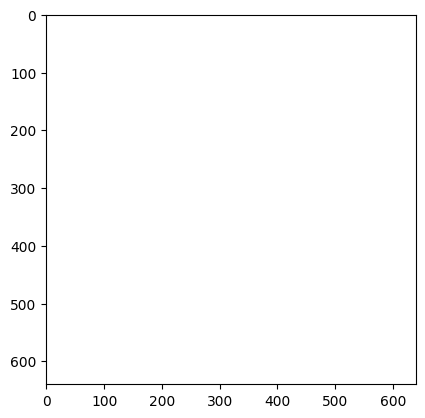

In [ ]:
plt.imshow(s[0])

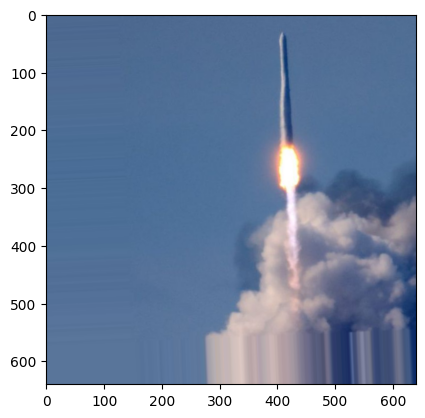

In [ ]:
plt.imshow(s[0].astype('uint8'))

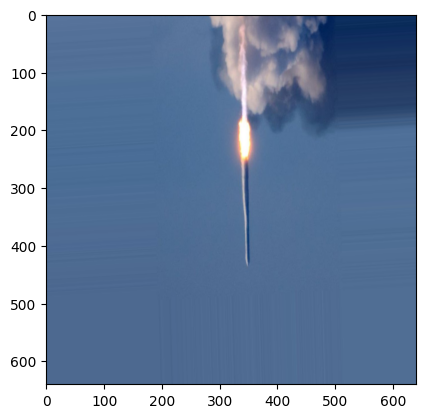

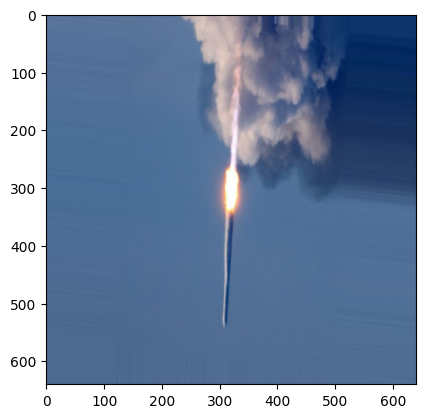

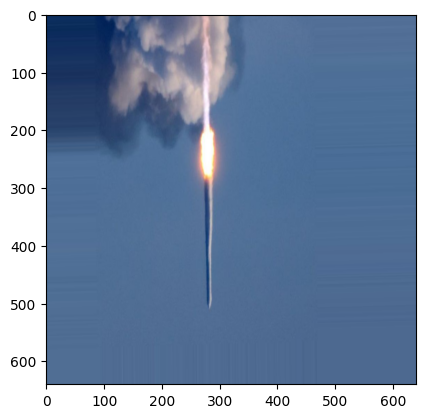

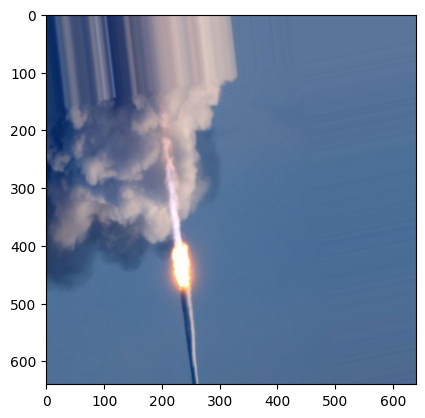

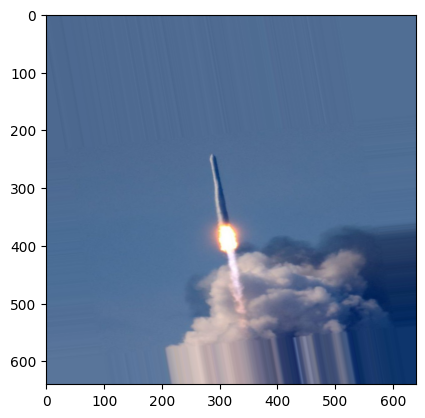

In [ ]:
for i in range(5):
  x = data_generator.next()
  x = x[0].astype('uint8')
  plt.imshow(x)
  plt.show()

전이 학습

: 어떤 도메인에서 수집한 데이터로 학습한 모델을 다른 도메인의 데이터를 인식하는데 활용해 성능을 향상하는 연구 주제이다.

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [ ]:
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 4s 0us/step


In [ ]:
img = load_img('./drive/MyDrive/nuriho.jpeg', target_size=(224,224))

In [ ]:
x = img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x[np.newaxis, :]

In [ ]:
x.shape

(1, 224, 224, 3)

In [ ]:
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

1/1 [==============================] - 6s 6s/step


In [ ]:
decode_predictions(preds, top=3)[0]

35363/35363 [==============================] - 0s 0us/step


[('n04008634', 'projectile', 0.50331664),
 ('n03773504', 'missile', 0.42003417),
 ('n04266014', 'space_shuttle', 0.07658704)]

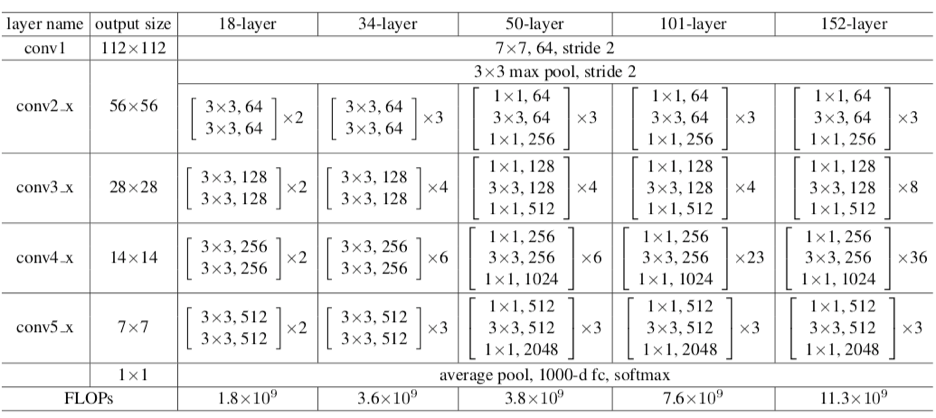

1. 120만개의 array 대신, 보유한 이미지의 특성맵(ResNet50)

    total_size = 7 * 7 * 2048 = 100352 =(224, 224, 2)

2. sample data 와 모든 데이터의 유사도 계산

3. 추천된 이미지의 정보 수집[링크 텍스트](https://)

In [ ]:
7*7*2048 / (224*224)

2.0

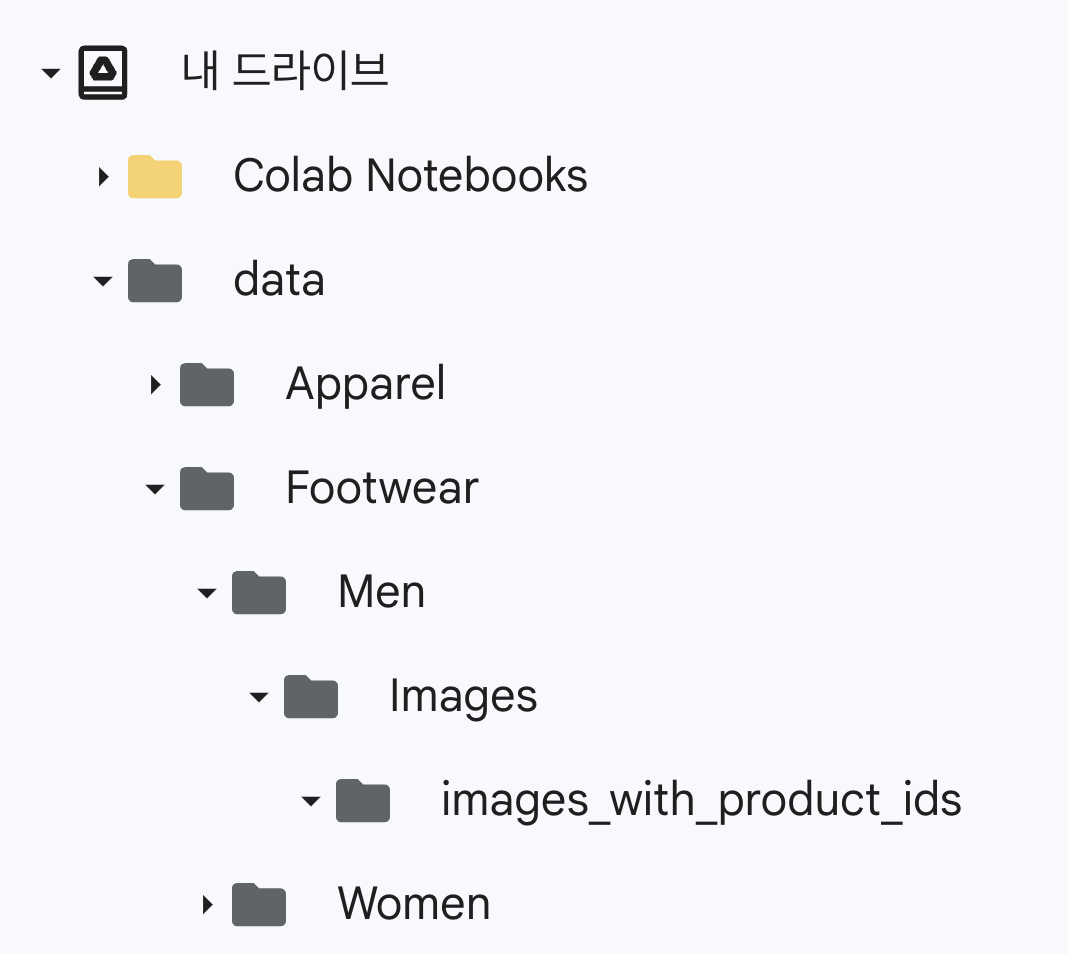

In [ ]:
ls ./drive/

MyDrive/


In [ ]:
ls ./drive/MyDrive/data/

Apparel/  fashion.csv  Footwear/


In [ ]:
ls ./drive/MyDrive/data/Footwear/

Men/  Women/


In [ ]:
ls ./drive/MyDrive/data/Footwear/Men/

Images/


In [ ]:
ls ./drive/MyDrive/data/Footwear/Men/Images

images_with_product_ids/


In [ ]:
!ls ./drive/MyDrive/data/Footwear/Men/Images/images_with_product_ids/ | wc -l

811


In [ ]:
ls ./drive/MyDrive/data

Apparel/  fashion.csv  Footwear/


In [ ]:
fashion_df = pd.read_csv('./drive/MyDrive/data/fashion.csv')

In [ ]:
fashion_df

In [ ]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductId     2906 non-null   int64 
 1   Gender        2906 non-null   object
 2   Category      2906 non-null   object
 3   SubCategory   2906 non-null   object
 4   ProductType   2906 non-null   object
 5   Colour        2906 non-null   object
 6   Usage         2906 non-null   object
 7   ProductTitle  2906 non-null   object
 8   Image         2906 non-null   object
 9   ImageURL      2906 non-null   object
dtypes: int64(1), object(9)
memory usage: 227.2+ KB


In [ ]:
fashion_df.Category.value_counts()

Footwear    1580
Apparel     1326
Name: Category, dtype: int64

In [ ]:
fashion_df.Gender.value_counts()

Men      811
Women    769
Boys     759
Girls    567
Name: Gender, dtype: int64

In [ ]:
fashion_df.groupby(['Gender'])['Category'].value_counts()

Gender  Category
Boys    Apparel     759
Girls   Apparel     567
Men     Footwear    811
Women   Footwear    769
Name: Category, dtype: int64

In [ ]:
footwear_men = fashion_df[fashion_df['Gender']=='Men']

In [ ]:
footwear_men.head()

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
1326,9204,Men,Footwear,Shoes,Casual Shoes,Black,Casual,Puma Men Future Cat Remix SF Black Casual Shoes,9204.jpg,http://assets.myntassets.com/v1/images/style/p...
1327,18653,Men,Footwear,Flip Flops,Flip Flops,Black,Casual,Fila Men Cush Flex Black Slippers,18653.jpg,http://assets.myntassets.com/v1/images/style/p...
1328,12967,Men,Footwear,Sandal,Sandals,Black,Casual,ADIDAS Men Spry M Black Sandals,12967.jpg,http://assets.myntassets.com/v1/images/style/p...
1329,9036,Men,Footwear,Shoes,Formal Shoes,Black,Formal,Buckaroo Men Flores Black Formal Shoes,9036.jpg,http://assets.myntassets.com/v1/images/style/p...
1330,39988,Men,Footwear,Shoes,Casual Shoes,White,Casual,Gas Men Europa White Shoes,39988.jpg,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
footwear_men.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 1326 to 2136
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductId     811 non-null    int64 
 1   Gender        811 non-null    object
 2   Category      811 non-null    object
 3   SubCategory   811 non-null    object
 4   ProductType   811 non-null    object
 5   Colour        811 non-null    object
 6   Usage         811 non-null    object
 7   ProductTitle  811 non-null    object
 8   Image         811 non-null    object
 9   ImageURL      811 non-null    object
dtypes: int64(1), object(9)
memory usage: 69.7+ KB


In [ ]:
img_width, img_height = 224, 224
train_data_dir = './drive/MyDrive/data/Footwear/Men/Images/'
nb_train_samples = 811
epochs = 50
batch_size = 1

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.0)
generator = datagen.flow_from_directory(train_data_dir,
                                        target_size=(img_width, img_height),
                                        batch_size = batch_size,
                                        class_mode = None,
                                        shuffle=False)

Found 811 images belonging to 1 classes.


In [ ]:
i_c = 1
for i in generator.filenames:
  print(i, i[i.find('/')+1:i.find('.')])
  i_c += 1
  if i_c > 10:
    break

images_with_product_ids/10037.jpg 10037
images_with_product_ids/10039.jpg 10039
images_with_product_ids/10097.jpg 10097
images_with_product_ids/10174.jpg 10174
images_with_product_ids/10180.jpg 10180
images_with_product_ids/10266.jpg 10266
images_with_product_ids/10267.jpg 10267
images_with_product_ids/10268.jpg 10268
images_with_product_ids/10293.jpg 10293
images_with_product_ids/10294.jpg 10294


In [ ]:
len(generator)

811

In [ ]:
def extract_features():
  Itemcodes=[]
  datagen = ImageDataGenerator(rescale=1./255.0)
  generator = datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                          batch_size = batch_size,class_mode = None, shuffle=False)
  model = ResNet50(include_top=False, weights='imagenet')
  for i in generator.filenames:
    Itemcodes.append(i[i.find('/')+1:i.find('.')])
  extracted_features = model.predict_generator(generator)
  extracted_features = extracted_features.reshape((811,100352))
  np.save(open('./Men_ResNet_features.npy', 'wb'), extracted_features)
  np.save(open('./Men_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
  return Itemcodes

In [ ]:
result = extract_features()

Found 811 images belonging to 1 classes.
94765736/94765736 [==============================] - 3s 0us/step


<ipython-input-117-31d74bd3cc45>:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  extracted_features = model.predict_generator(generator)


In [ ]:
ls

best_gru-model.h5  Men_ResNet_feature_product_ids.npy  sample_data/
drive/             Men_ResNet_features.npy


In [ ]:
extracted_features = np.load('./Men_ResNet_features.npy')
Productids = np.load('./Men_ResNet_feature_product_ids.npy')

In [ ]:
extracted_features.shape #(811, 100352)

(811, 100352)

In [ ]:
Productids[:10]

array(['10037', '10039', '10097', '10174', '10180', '10266', '10267',
       '10268', '10293', '10294'], dtype='<U5')

In [ ]:
men = footwear_men.copy()
df_Productids= list(men['ProductId'])

In [ ]:
Productids = list(Productids)

id=9204 일때, npy 파일에 저장된 index 번호를 알아내자

In [ ]:
Productids.index('9204')

803

In [ ]:
extracted_features[803]

array([0.       , 0.       , 0.       , ..., 4.9573536, 0.       ,
       0.       ], dtype=float32)

In [ ]:
from sklearn.metrics import pairwise_distances
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from datetime import datetime
from IPython.display import display, Image

In [ ]:
import seaborn as sns

In [ ]:
pairwise_dist = pairwise_distances(extracted_features, extracted_features[803].reshape(1,-1))

In [ ]:
pairwise_dist.shape

(811, 1)

In [ ]:
pairwise_dist[:4]

array([[61.506577],
       [64.08342 ],
       [62.210655],
       [70.06772 ]], dtype=float32)

In [ ]:
num_results=5
indices = np.argsort(pairwise_dist.flatten())[:num_results]

In [ ]:
indices

array([803, 395, 467, 536, 769])

In [ ]:
pdists = np.sort(pairwise_dist.flatten())[:num_results]

In [ ]:
pdists

array([5.3947965e-06, 3.6749180e+01, 3.8417187e+01, 3.8466507e+01,
       3.8807823e+01], dtype=float32)

In [ ]:
ip_row=men[['ProductId','ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[0]])]

In [ ]:
ip_row

,ProductId,ImageURL,ProductTitle
1326,9204,http://assets.myntassets.com/v1/images/style/p...,Puma Men Future Cat Remix SF Black Casual Shoes


1326
ProductId                                                    9204
ImageURL        http://assets.myntassets.com/v1/images/style/p...
ProductTitle      Puma Men Future Cat Remix SF Black Casual Shoes
Name: 1326, dtype: object


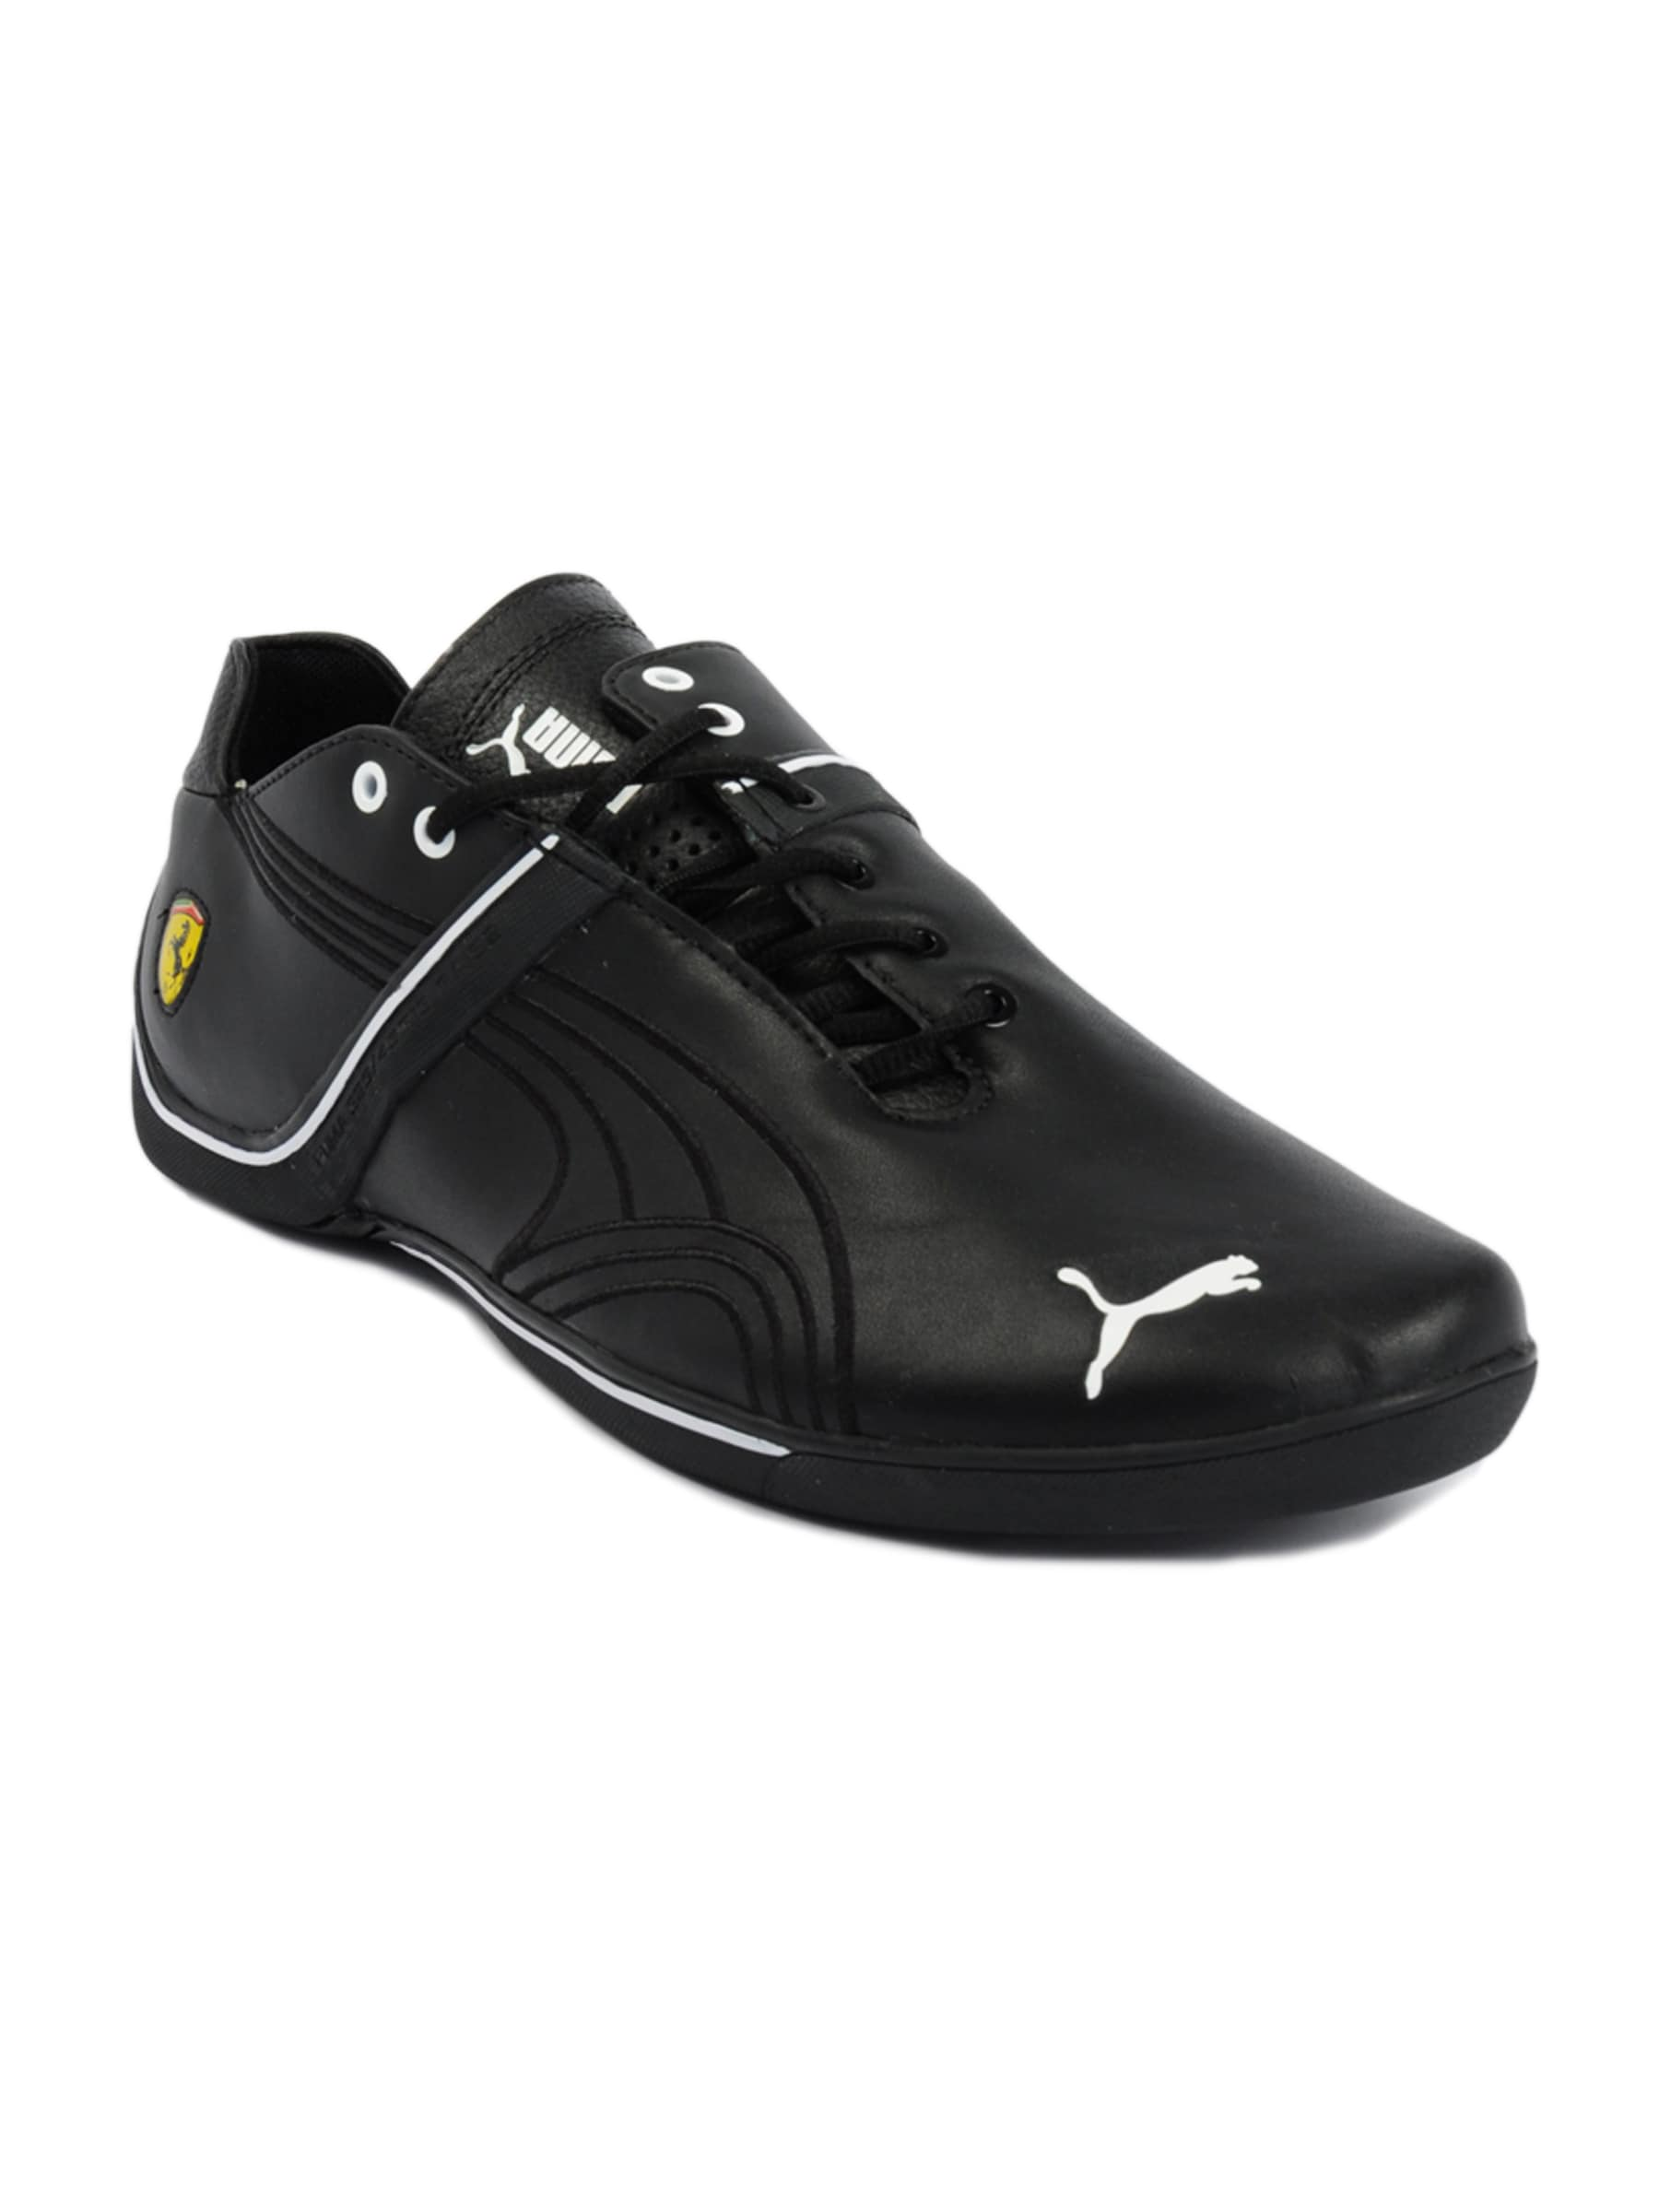

In [ ]:
for index, row in ip_row.iterrows():
  print(index)
  print('=='*20)
  print(row)
  display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))

1


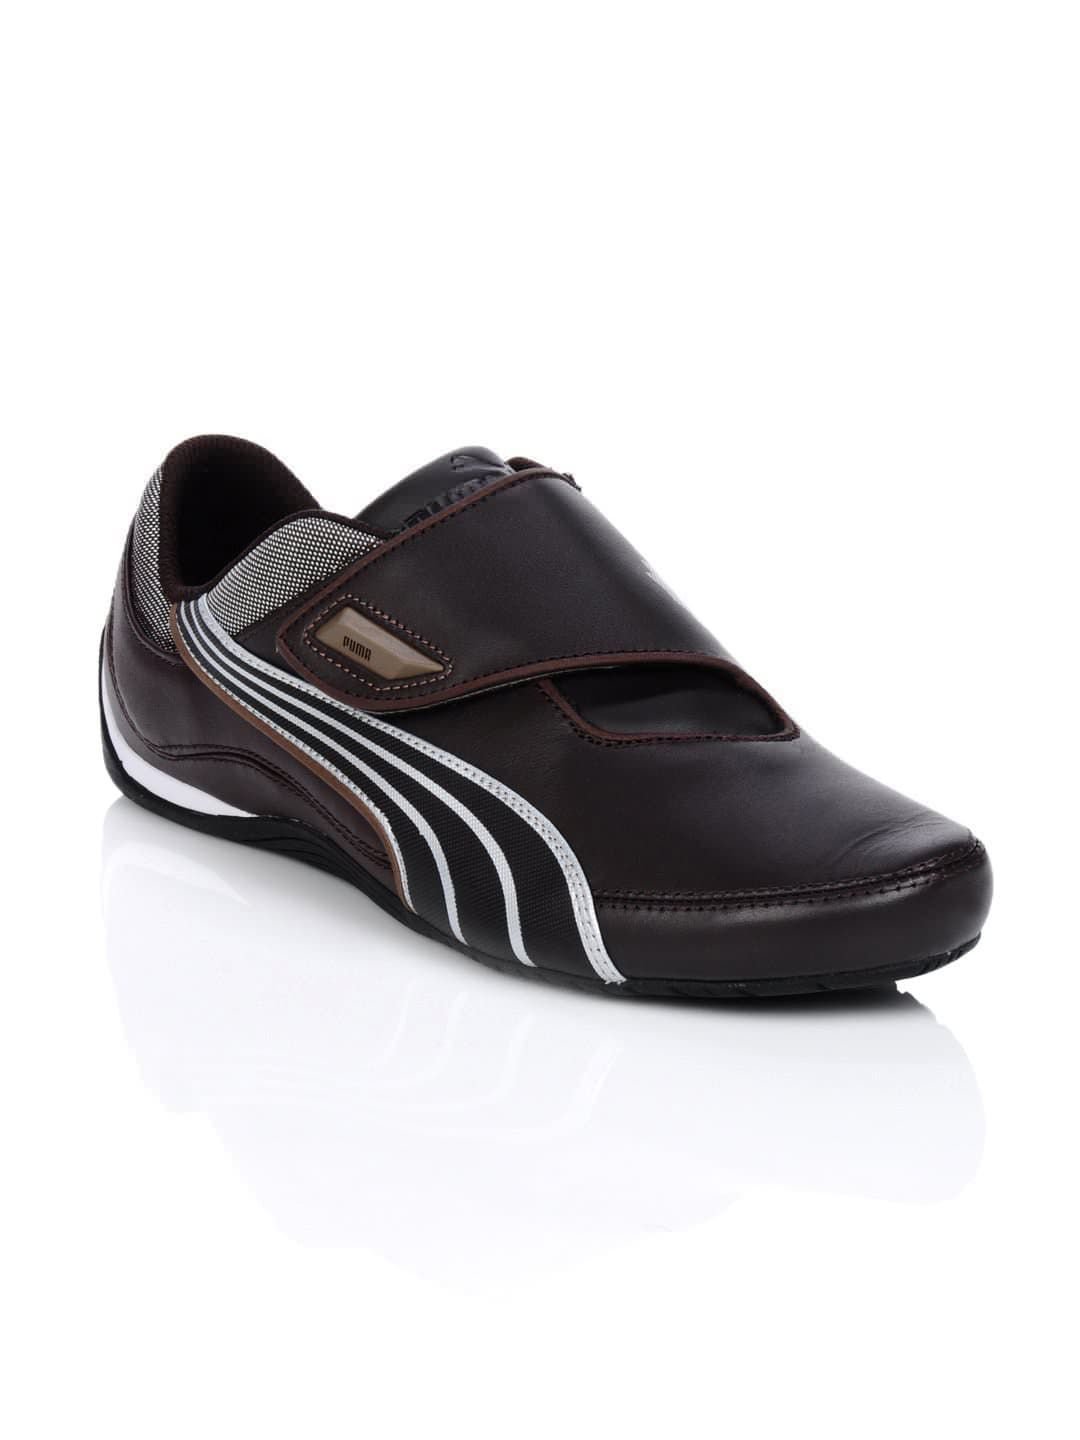

Product Title:  Puma Men Drift Cat Brown Shoes
Euclidean Distance from input image: 36.74918
2


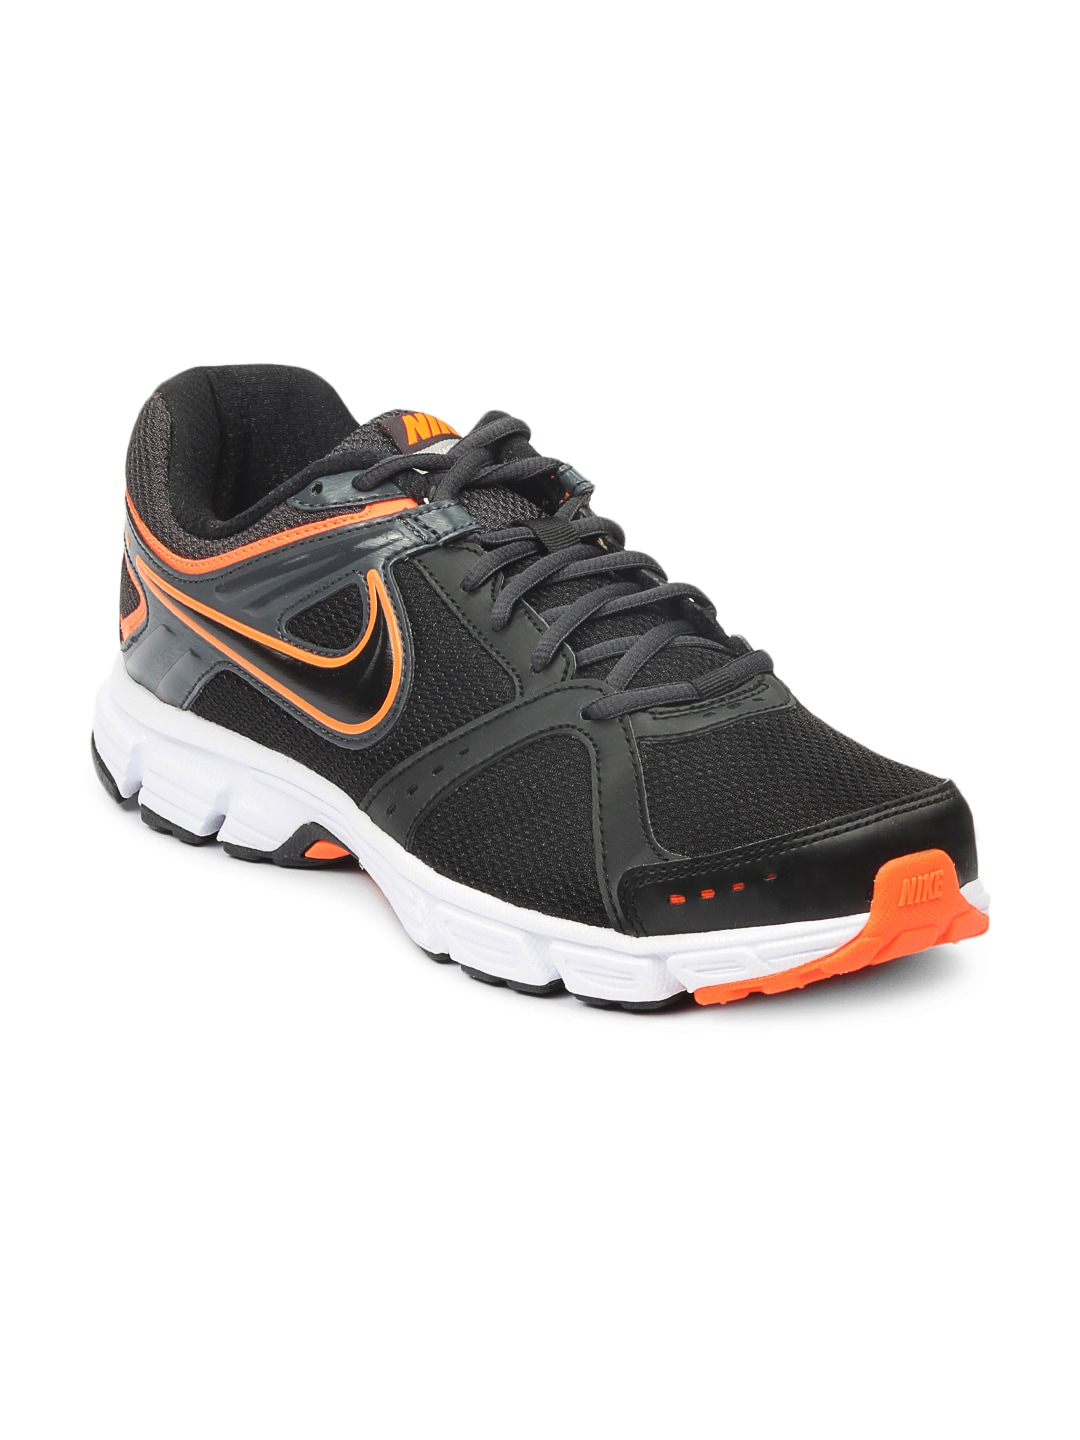

Product Title:  Nike Men Downshifter Black Sports Shoes
Euclidean Distance from input image: 38.417187
3


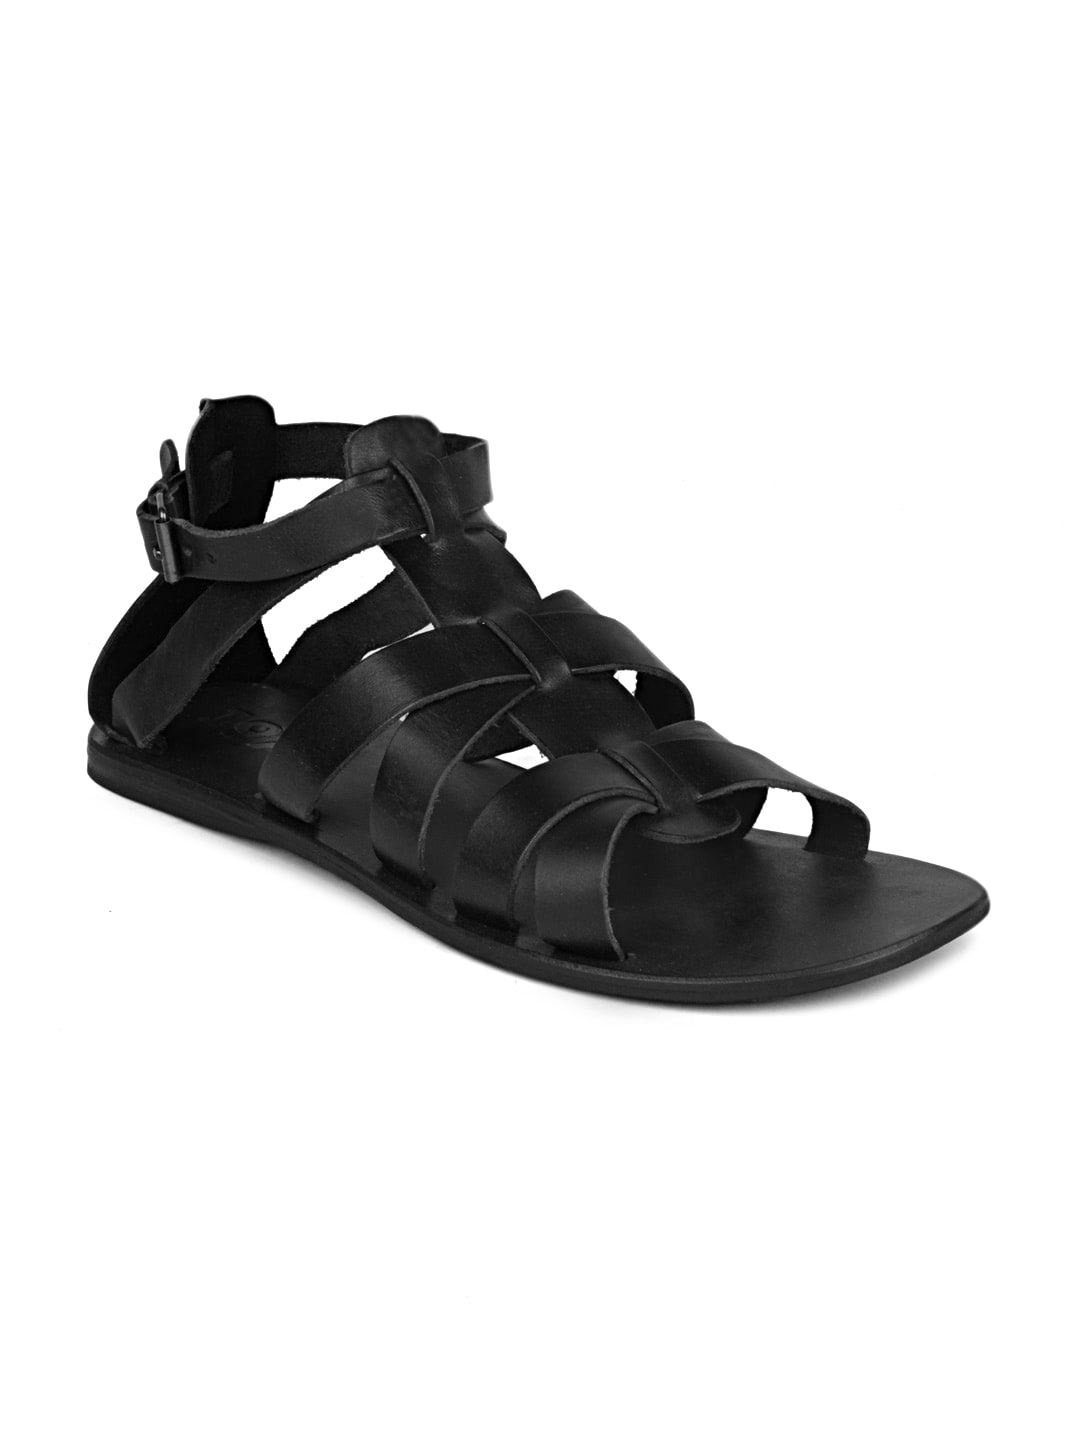

Product Title:  Estd. 1977 Men Black Sandals
Euclidean Distance from input image: 38.466507
4


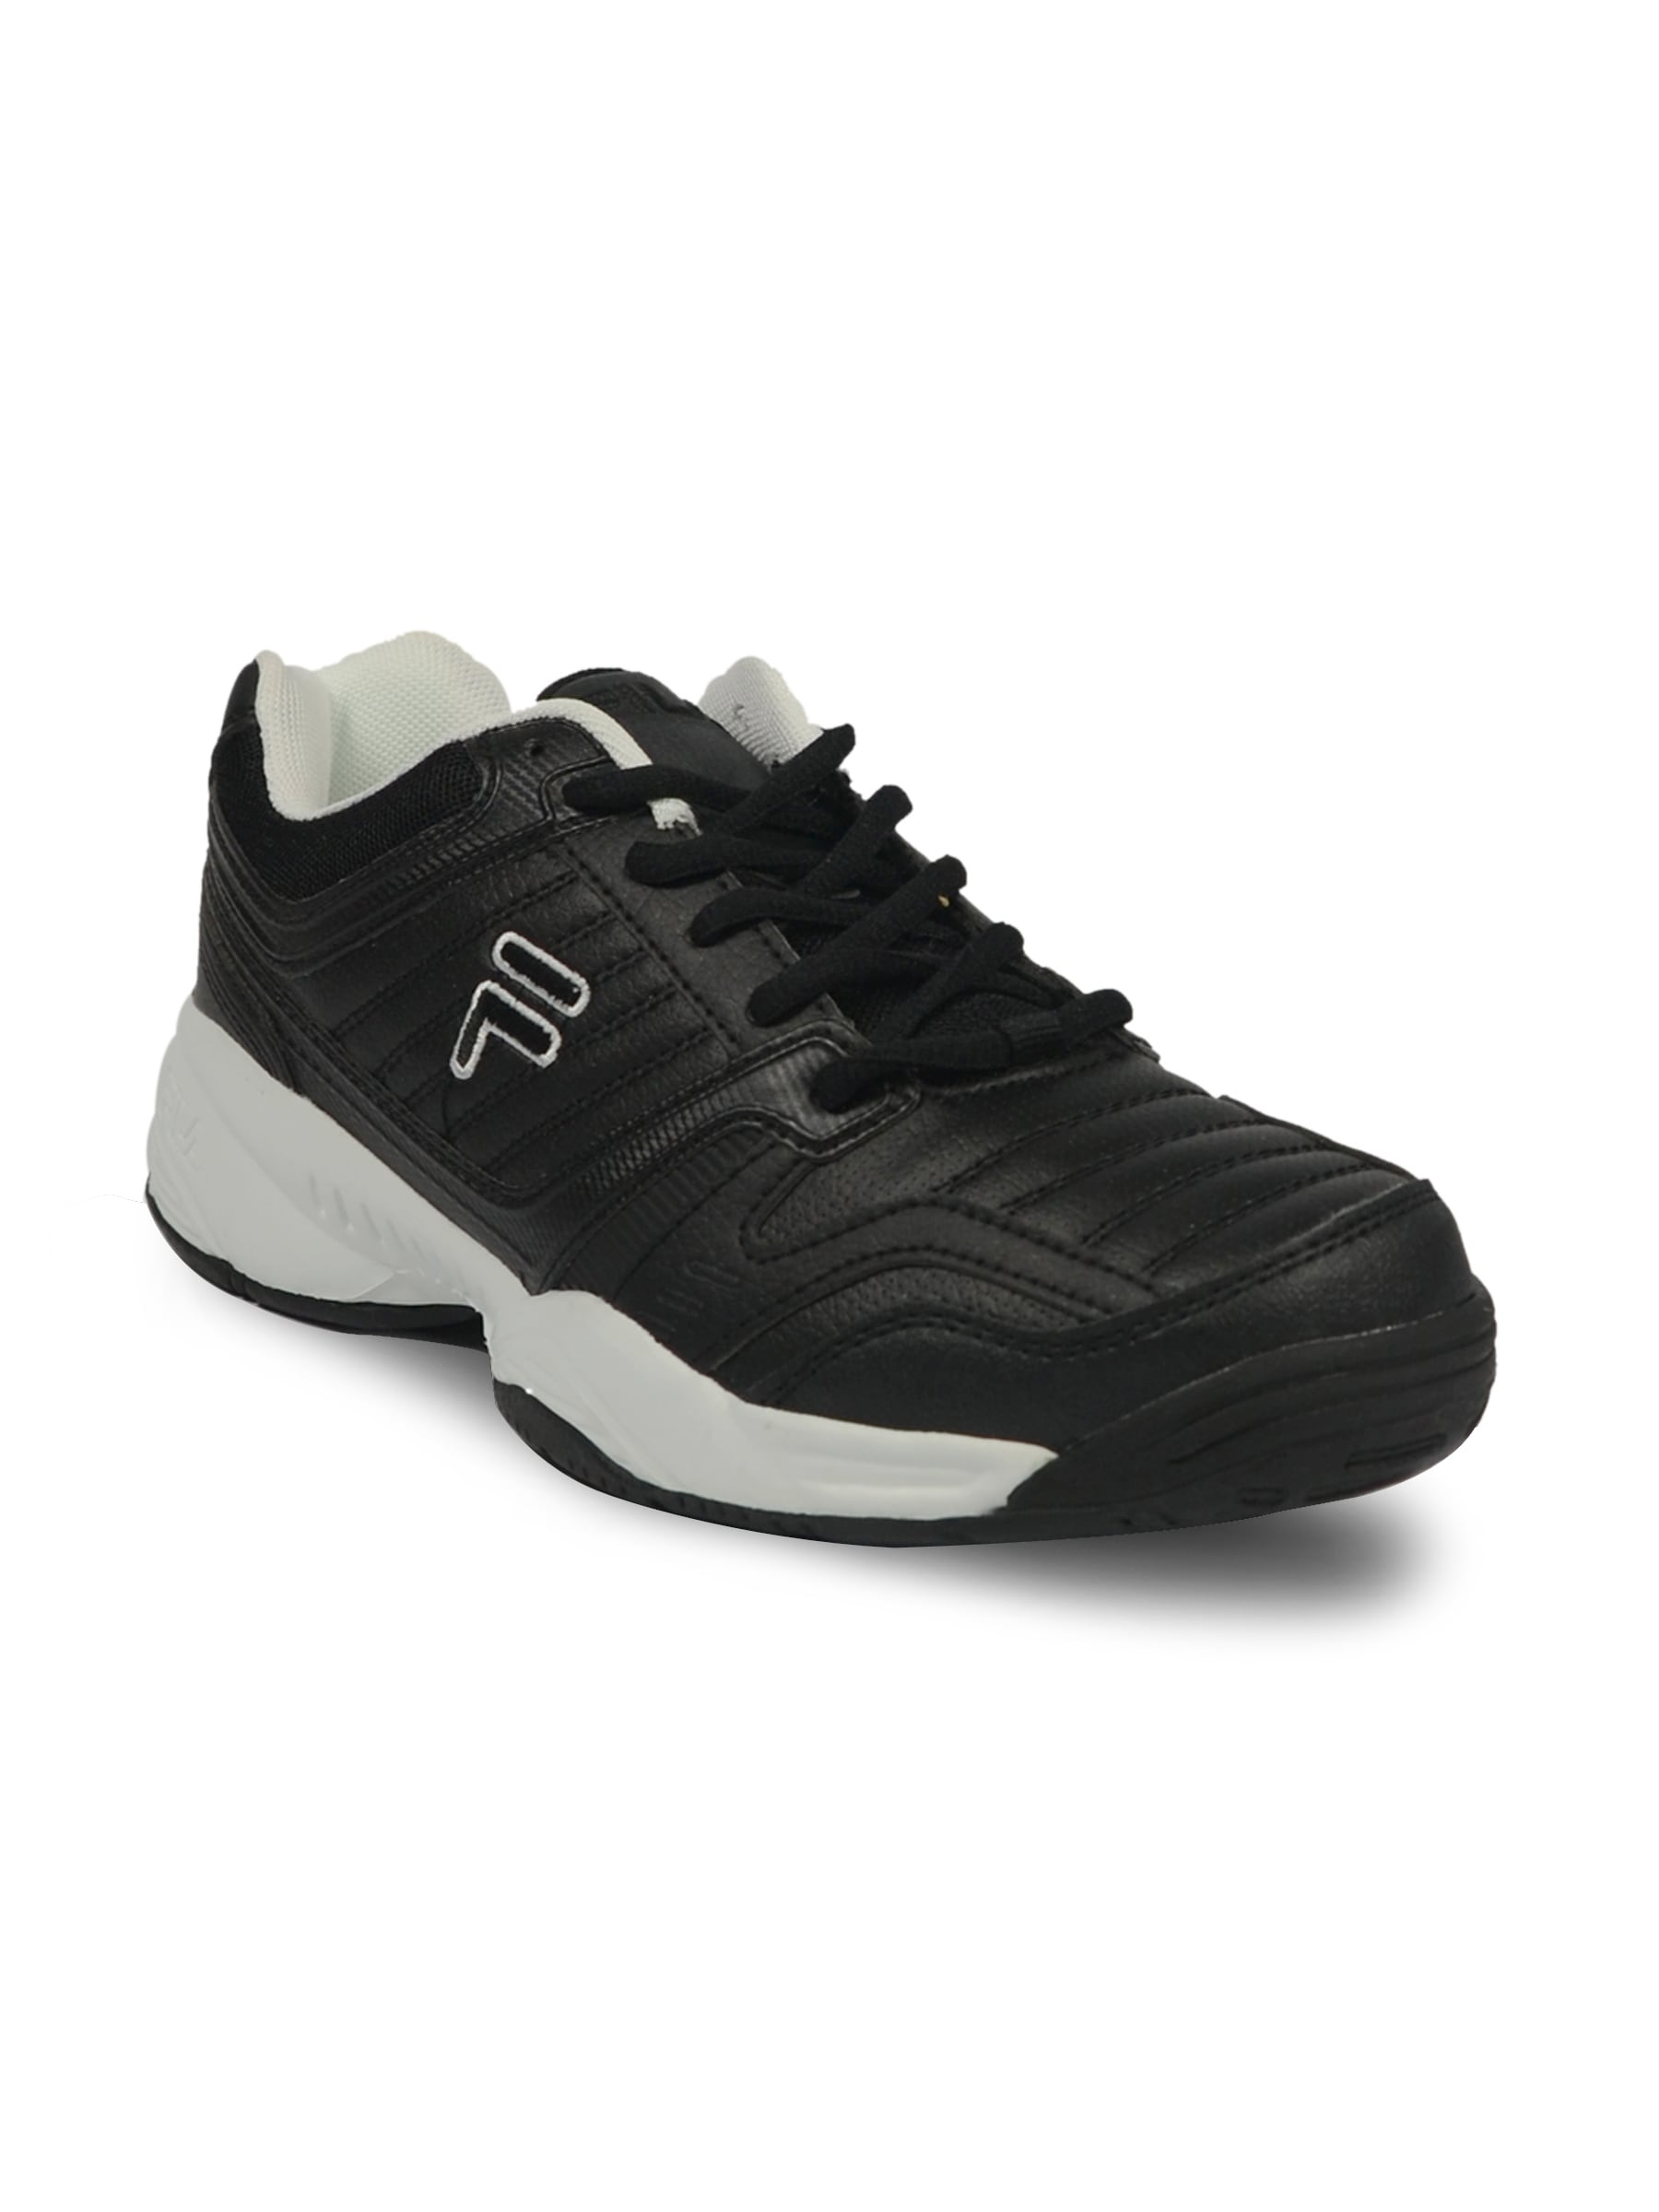

Product Title:  Fila Men's Victory Black Shoe
Euclidean Distance from input image: 38.807823


In [ ]:
for i in range(1, len(indices)):
  print(i)
  rows = men[['ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[i]])]
  for indx, row in rows.iterrows():
    display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
    print('Product Title: ', row['ProductTitle'])
    print('Euclidean Distance from input image:', pdists[i])